## Setup

In [1]:
# Packages
import pandas as pd
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import math

In [2]:
# Import data
tor_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_train_set_no_zeros_mob_home.csv")


# Quick inspection
tor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8230 entries, 0 to 8229
Data columns (total 33 columns):
DAMAGE_PROPERTY       8230 non-null float64
DURATION_SECONDS      8230 non-null float64
BEGIN_LAT             8230 non-null float64
BEGIN_LON             8230 non-null float64
TOR_LENGTH            8230 non-null float64
TOR_WIDTH             8230 non-null float64
YEAR                  8230 non-null float64
OPEN_WATER_PROP       8230 non-null float64
DEV_OPEN_PROP         8230 non-null float64
DEV_LOW_PROP          8230 non-null float64
DEV_MED_PROP          8230 non-null float64
DEV_HIGH_PROP         8230 non-null float64
DECID_FOREST_PROP     8230 non-null float64
EVERGR_FOREST_PROP    8230 non-null float64
MIXED_FOREST_PROP     8230 non-null float64
SHRUB_SCRUB_PROP      8230 non-null float64
GRASS_LAND_PROP       8230 non-null float64
PASTURE_HAY_PROP      8230 non-null float64
CULT_CROPS_PROP       8230 non-null float64
WOOD_WETLAND_PROP     8230 non-null float64
HERB_WETLAND_

In [3]:
# Seperating variables
# The dependent variables
tornado_outcomes = tor_df.iloc[:, [0]]


# Quick inspection
tornado_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8230 entries, 0 to 8229
Data columns (total 1 columns):
DAMAGE_PROPERTY    8230 non-null float64
dtypes: float64(1)
memory usage: 64.4 KB


In [4]:
# The independent variables
tornado_features = tor_df.iloc[:, 1:]


# Quick inspection
tornado_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8230 entries, 0 to 8229
Data columns (total 32 columns):
DURATION_SECONDS      8230 non-null float64
BEGIN_LAT             8230 non-null float64
BEGIN_LON             8230 non-null float64
TOR_LENGTH            8230 non-null float64
TOR_WIDTH             8230 non-null float64
YEAR                  8230 non-null float64
OPEN_WATER_PROP       8230 non-null float64
DEV_OPEN_PROP         8230 non-null float64
DEV_LOW_PROP          8230 non-null float64
DEV_MED_PROP          8230 non-null float64
DEV_HIGH_PROP         8230 non-null float64
DECID_FOREST_PROP     8230 non-null float64
EVERGR_FOREST_PROP    8230 non-null float64
MIXED_FOREST_PROP     8230 non-null float64
SHRUB_SCRUB_PROP      8230 non-null float64
GRASS_LAND_PROP       8230 non-null float64
PASTURE_HAY_PROP      8230 non-null float64
CULT_CROPS_PROP       8230 non-null float64
WOOD_WETLAND_PROP     8230 non-null float64
HERB_WETLAND_PROP     8230 non-null float64
BARREN_LAND_P

In [5]:
# Make the dependent variables into a numpy array
outcomes_array = tornado_outcomes.values


# Makes the numpy array into a torch Tensor
outcomes_Tensor = torch.from_numpy(outcomes_array)


# Quick inspection
outcomes_Tensor


 0.7085
 0.5805
 0.7085
   ⋮    
 0.9397
 0.9644
 0.7085
[torch.DoubleTensor of size 8230x1]

In [6]:
# Make the independent variables into a numpy array
features_array = tornado_features.values


# Make the numpy array into a torch Tensor
features_Tensor = torch.from_numpy(features_array)


# Quick inspection
features_Tensor


-3.0188e-01 -3.7157e-01  6.1740e-01  ...   8.5283e-01 -8.7299e-01  3.0227e-01
 6.8209e-01 -9.3529e-01  1.1152e+00  ...   8.4258e-01  1.5787e+00 -5.1904e-02
-2.2607e+00  1.8028e-01  8.2261e-01  ...   2.1240e-01 -6.2229e-01 -1.8228e+00
                ...                   ⋱                   ...                
 4.5872e-01 -1.9908e+00  1.1802e+00  ...   1.7873e+00  1.2653e+00  6.5645e-01
 6.8209e-01  3.0892e-01  5.3075e-01  ...   1.0947e+00 -9.6516e-01 -5.1904e-02
-2.2607e+00 -1.4187e+00 -8.0176e-02  ...   3.8968e-01 -1.3154e+00 -4.0608e-01
[torch.DoubleTensor of size 8230x32]

### Convert DoubleTensor to FloatTensor

In [7]:
# Changing dependent variables from a DoubleTensor to a FloatTensor
outcomes_Tensor = outcomes_Tensor.float()


# ...and for the independent variables
features_Tensor = features_Tensor.float()


# Quick check
features_Tensor


-3.0188e-01 -3.7157e-01  6.1740e-01  ...   8.5283e-01 -8.7299e-01  3.0227e-01
 6.8209e-01 -9.3529e-01  1.1152e+00  ...   8.4258e-01  1.5787e+00 -5.1904e-02
-2.2607e+00  1.8028e-01  8.2261e-01  ...   2.1240e-01 -6.2229e-01 -1.8228e+00
                ...                   ⋱                   ...                
 4.5872e-01 -1.9908e+00  1.1802e+00  ...   1.7873e+00  1.2653e+00  6.5645e-01
 6.8209e-01  3.0892e-01  5.3075e-01  ...   1.0947e+00 -9.6516e-01 -5.1904e-02
-2.2607e+00 -1.4187e+00 -8.0176e-02  ...   3.8968e-01 -1.3154e+00 -4.0608e-01
[torch.FloatTensor of size 8230x32]

## Round 1: One-Hidden-Layer Neural Network

In [8]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [9]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(32, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 1))

In [10]:
# Set the loss function
loss_fn = torch.nn.MSELoss(size_average=False)

In [11]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

In [12]:
# Get the iterations
iterations = list(range(0, 10000))

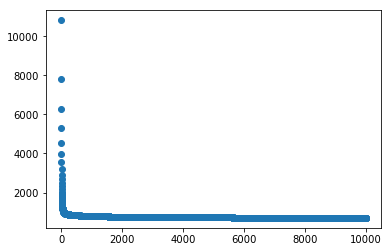

In [13]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [14]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

In [15]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
outcomes_Variable_resized = outcomes_Variable.resize(8230)


# Make the FloatTensor into a numpy.array
outcomes_array = outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
outcomes_list = outcomes_array.tolist()

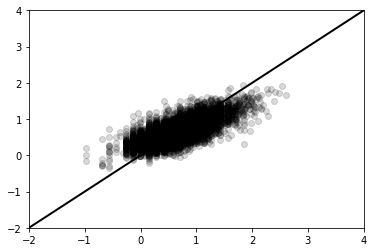

In [16]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 1.1: Validation Set Performance

In [17]:
# Import data
valid_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_cv_set_no_zeros_mob_home.csv")


# Validation set outcomes
valid_outcomes = valid_df.iloc[:, [0]]


# Make the validation outcomes into a numpy array
valid_outcomes_array = valid_outcomes.values


# Makes the numpy array into a torch Tensor
valid_outcomes_Tensor = torch.from_numpy(valid_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
valid_outcomes_Tensor = valid_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_outcomes_Variable = Variable(valid_outcomes_Tensor)

In [18]:
# Validation set predictors
valid_predictors = valid_df.iloc[:, 1:]


# Make the validation predictors into a numpy array
valid_predictors_array = valid_predictors.values


# Makes the numpy array into a torch Tensor
valid_predictors_Tensor = torch.from_numpy(valid_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
valid_predictors_Tensor = valid_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_predictors_Variable = Variable(valid_predictors_Tensor)

In [19]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 279.0164
[torch.FloatTensor of size 1]

In [20]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

In [21]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
valid_outcomes_Variable_resized = valid_outcomes_Variable.resize(2748)


# Make the FloatTensor into a numpy.array
valid_outcomes_array = valid_outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
valid_outcomes_list = valid_outcomes_array.tolist()

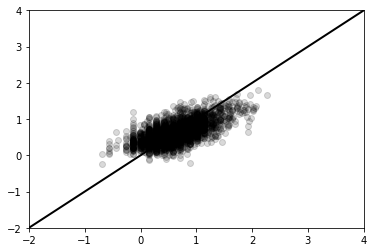

In [22]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 1.2: Test Set Performance

In [23]:
# Import data
test_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_test_set_no_zeros_mob_home.csv")


# Validation set outcomes
test_outcomes = test_df.iloc[:, [0]]


# Make the validation outcomes into a numpy array
test_outcomes_array = test_outcomes.values


# Makes the numpy array into a torch Tensor
test_outcomes_Tensor = torch.from_numpy(test_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
test_outcomes_Tensor = test_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
test_outcomes_Variable = Variable(test_outcomes_Tensor)

In [24]:
# Validation set predictors
test_predictors = test_df.iloc[:, 1:]


# Make the validation predictors into a numpy array
test_predictors_array = test_predictors.values


# Makes the numpy array into a torch Tensor
test_predictors_Tensor = torch.from_numpy(test_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
test_predictors_Tensor = test_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
test_predictors_Variable = Variable(test_predictors_Tensor)

In [25]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 266.7073
[torch.FloatTensor of size 1]

In [26]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.41747 + 7.67485


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

In [27]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
test_outcomes_Variable_resized = test_outcomes_Variable.resize(2699)


# Make the FloatTensor into a numpy.array
test_outcomes_array = test_outcomes_Variable_resized.data.numpy()


# Convert back to native units and scale
test_outcomes_array = test_outcomes_array*5.41747 + 7.67485


# Make the numpy.array into a list
test_outcomes_list = test_outcomes_array.tolist()

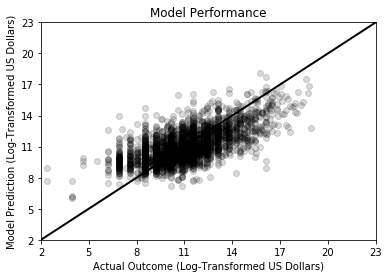

In [28]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [29]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.0810 -0.1137  0.1269  0.0063 -0.0047 -0.1291 -0.0051  0.1217 -0.0734  0.0849
 0.0081  0.0314  0.0637 -0.1876  0.1469  0.1042 -0.2593 -0.3341  0.1647  0.0119
 0.0820  0.3951  0.1060 -0.2346  0.0642 -0.3347 -0.1509 -0.5707  0.0800  0.1004
-0.1626  0.1120  0.0840  0.0125  0.0529  0.0206 -0.0786 -0.1001 -0.1983  0.2237
 0.0943 -0.1184  0.0248  0.0746  0.1275  0.0183  0.1167  0.0978  0.0029  0.1337
-0.0969  0.1212  0.4282  0.0570  0.1466 -0.2538  0.2305 -0.2211 -0.2172 -0.1456
 0.0143  0.0851 -0.0590  0.1490 -0.1118 -0.2622  0.0582  0.0456  0.2114  0.0544
-0.1015 -0.0738  0.1660  0.1165  0.0091  0.2764  0.0525  0.0265  0.0353 -0.1588
 0.1274 -0.2435  0.1147 -0.1299  0.2182 -0.0785 -0.1543 -0.0859  0.3875 -0.0381
 0.0921  0.1043  0.0349  0.1584 -0.1814  0.1598 -0.0034  0.3091  0.1077  0.0851
 0.0719  0.0636 -0.0514 -0.0137 -0.1268 -0.2746  0.0030  0.0527 -0.1397  0.1207
-0.0465  0.0662  0.0400 -0.1061 -0.2971  0.1014 -0.1939 -0.0895  0.1122  0.0433
 

In [30]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.1713 -0.2018  0.1886 -0.1234 -0.1658  0.1887 -0.1734 -0.1855  0.2471  0.1668

Columns 10 to 19 
-0.2381  0.1749  0.2687  0.2670 -0.2741 -0.2430 -0.2051  0.2809  0.2148 -0.2447

Columns 20 to 20 
-0.1148
[torch.FloatTensor of size 1x21]

## Round 2: Two-Hidden-Layer Neural Network

In [31]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [32]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(32, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 14),
                            torch.nn.ReLU(),
                            torch.nn.Linear(14, 1))

In [33]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

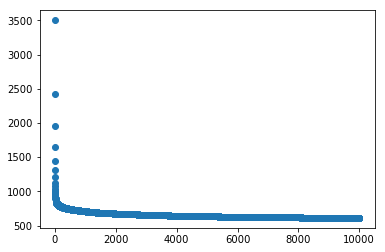

In [34]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [35]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

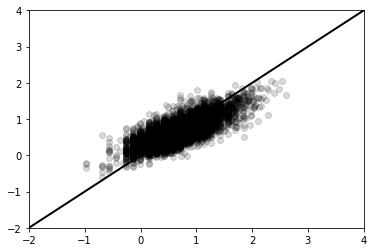

In [36]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 2.1: Validation Set Performance

In [37]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 295.7240
[torch.FloatTensor of size 1]

In [38]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

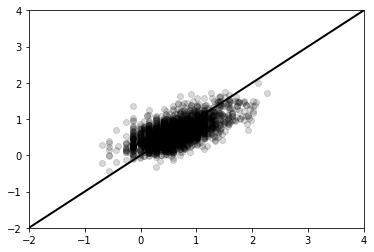

In [39]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 2.2: Test Set Performance

In [40]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 289.3266
[torch.FloatTensor of size 1]

In [41]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.41747 + 7.67485


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

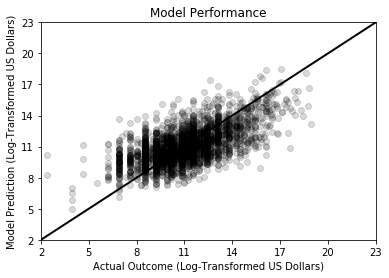

In [42]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [43]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.0491 -0.2604  0.4467  0.3388 -0.0356  0.4165 -0.0270  0.2246  0.2536 -0.3192
 0.1043 -0.5744  0.0145 -0.0306  0.1056  0.1056 -0.1640 -0.0929  0.1028  0.2236
 0.0644  0.4997 -0.0882 -0.0994  0.1805  0.1402  0.1140  0.1581 -0.0494  0.0860
 0.1690 -0.0308 -0.4150  0.0071 -0.0712  0.1879 -0.2351  0.1091  0.1150  0.0777
-0.1189  0.4553  0.1064  0.1559  0.1084  0.0305  0.0037  0.0884 -0.0022  0.0022
-0.0866  0.2381  0.0724  0.1254  0.0200  0.2326  0.1324 -0.2607 -0.2515  0.0552
-0.0204 -0.3192 -0.6309 -0.1827 -0.3770 -0.2665  0.2308 -0.2634 -0.1283  0.0023
-0.0051 -0.0296 -0.0823  0.1839  0.2896 -0.0077 -0.0409  0.1491 -0.0768 -0.0897
-0.0062  0.1964 -0.1677 -0.6312 -0.2182  0.0907  0.0534  0.1710  0.1378 -0.0933
 0.0332  0.0882  0.4221  0.1700  0.1966 -0.2339 -0.1274 -0.2684  0.2042  0.2925
 0.0730  0.1117 -0.0899  0.0448  0.0503  0.0079  0.0490  0.1053 -0.3718  0.0913
-0.0097 -0.0607  0.3773  0.0562  0.1169 -0.8388  0.3342  0.3025 -0.1087  0.1269
-

In [44]:
model[(2)].weight

Parameter containing:

Columns 0 to 5 
-2.7337e-01 -1.3395e-01 -3.6602e-02 -2.4556e-01  2.6632e-01  1.0183e-01
 4.8019e-05 -4.0243e-01 -1.4802e-01 -1.3059e-01  2.1351e-01  2.1835e-01
 9.2931e-02  7.5774e-02 -1.1776e-01  3.5923e-01  1.5879e-01  2.6520e-01
-2.2535e-02 -3.4814e-01  1.9090e-01 -2.8340e-02 -3.5666e-02  2.8816e-01
 1.7728e-01 -5.3990e-02  1.5405e-01 -1.9298e-01  1.5467e-01  1.0813e-01
-1.1795e-01  1.5211e-01 -1.4563e-01  4.4720e-03 -2.5457e-01  2.0172e-01
 1.5399e-01  2.7414e-01 -3.9412e-01  3.5163e-01  7.2935e-02  3.7851e-02
-4.6560e-01 -5.2449e-01  1.0225e-01 -2.3407e-01 -3.4256e-01  1.2405e-01
-2.9079e-01  5.1341e-02  1.8824e-01  2.3843e-02  3.8774e-02  1.3461e-01
 2.0939e-01  3.6214e-01  5.2764e-01  5.8491e-01  2.0067e-02 -1.9406e-02
-1.7862e-01  1.0851e-01 -2.9068e-01 -7.7705e-01  3.0664e-01 -3.6192e-01
-2.1061e-01  2.6138e-01 -3.9129e-01 -6.6936e-01  2.0458e-01 -2.6326e-02
-6.2264e-02  1.5549e-02 -4.7678e-02  4.2426e-02  1.9551e-01 -4.1779e-02
-2.0830e-01 -2.0839e-01  

In [45]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
-0.4849 -0.6511  0.4863  0.2370  0.1306 -0.5138 -0.3318 -0.5813  0.2805  0.1575

Columns 10 to 13 
-0.5347  0.5369  0.0684 -0.4208
[torch.FloatTensor of size 1x14]

## Round 3: Three-Hidden-Layer Neural Network

In [46]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [47]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(32, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 14),
                            torch.nn.ReLU(),
                            torch.nn.Linear(14, 9),
                            torch.nn.ReLU(),
                            torch.nn.Linear(9, 1))

In [48]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

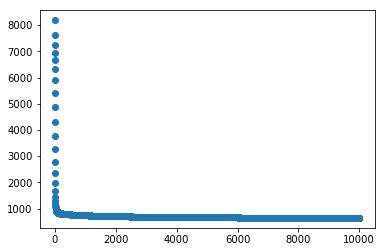

In [49]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [50]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

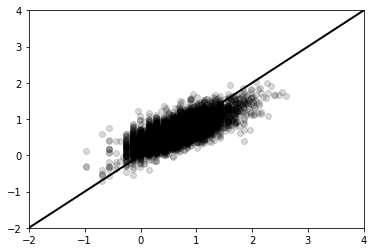

In [51]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 3.1: Validation Set Performance

In [52]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 292.5086
[torch.FloatTensor of size 1]

In [53]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

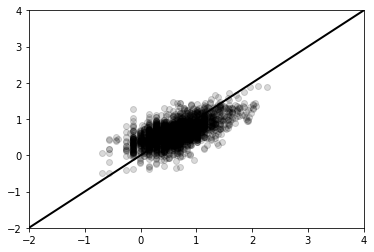

In [54]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 3.2: Test Set Performance

In [55]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 281.8849
[torch.FloatTensor of size 1]

In [56]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.41747 + 7.67485


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

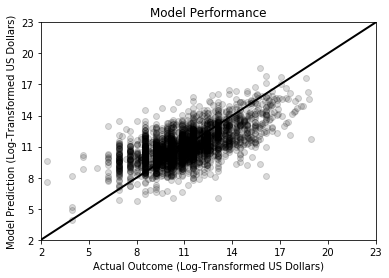

In [57]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [58]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.0743 -0.2228  0.0120 -0.5033 -0.3031 -0.0500  0.0576 -0.1335  0.5327 -0.1676
 0.1751  0.5178 -0.1347  0.2802  0.1146 -0.1878 -0.0985 -0.1153  0.1510  0.1994
-0.0988  0.4078  0.3276  0.0485  0.3144 -0.1394  0.0410 -0.0817 -0.2035  0.2965
 0.1571 -0.1348 -0.3264 -0.1113  0.0890  0.3394 -0.0321  0.3827 -0.0485  0.2844
-0.0076  0.4129 -0.1385 -0.2102  0.0481  0.0276  0.2620  0.2787  0.0054 -0.2903
 0.2628  0.0891  0.2255  0.1739  0.1829  0.0433 -0.0864  0.0817 -0.2933 -0.0400
 0.0923 -0.0061  0.4252 -0.0921  0.0542 -0.5256 -0.0257 -0.4783  0.2057 -0.0425
 0.1400  0.3025  0.0417  0.0373  0.0458 -0.0487  0.1306  0.2802  0.0303 -0.1972
 0.2040 -0.0439 -0.0384 -0.0362  0.0267  0.4336 -0.3281  0.0897 -0.0075  0.3857
 0.0243  0.0310 -0.3732  0.0582  0.0595  0.0415 -0.1717  0.3104  0.0658  0.0928
 0.0398 -0.6326 -0.1527  0.0668 -0.1135  0.1147  0.1232  0.2412  0.0281 -0.1329
 0.0122  0.3856  0.1128  0.0210  0.1662  0.2614 -0.0279 -0.0591  0.2761  0.1276
-

In [59]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.1717  0.2853  0.1798  0.0280  0.0187  0.2791  0.0538 -0.0427 -0.0607  0.2369
 0.3349 -0.0978  0.0128  0.0589  0.2946  0.3146  0.1354 -0.0986 -0.1171  0.1609
 0.1878  0.2621  0.2127  0.0686  0.0452  0.1720  0.1989  0.0607 -0.0078  0.2288
 0.1131  0.2956  0.0178  0.4095  0.1025 -0.0558  0.2569  0.3064  0.2046 -0.0352
-0.3073 -0.0428  0.2365  0.3440 -0.1895  0.0773  0.2226 -0.2174  0.0746  0.0664
-0.2498 -0.3684 -0.1432 -1.0809  0.4084  0.3228 -0.0496 -0.3925  0.2683 -0.5203
 0.2444  0.2221  0.2525  0.0473  0.0691  0.1181  0.2837 -0.0839  0.2612  0.0740
 0.1030  0.3014  0.0087  0.0644 -0.3279 -0.4232 -0.0888 -0.4976 -0.0225  0.1253
-0.2258  0.5445 -1.2592  0.0399  0.2175 -0.5646  0.2132  0.2604 -0.4889 -0.3825
 0.1405 -0.1058  0.1407  0.2556  0.0581  0.2407 -0.0098 -0.0150  0.3006 -0.1226
-0.0035  0.1115  0.2165 -1.5858 -0.2860 -1.4170 -0.7868  0.1877 -0.7271 -0.1467
 0.2478  0.2420  0.0075  0.1571 -1.3439  0.4116 -0.8946 -1.4262  0.3111 -0.2921
 

In [60]:
model[(4)].weight

Parameter containing:

Columns 0 to 5 
-2.7469e-01 -1.4975e-01 -1.5063e-01 -1.4756e-01 -1.1799e-01 -8.2782e-02
-2.7708e-01 -1.7992e-01 -2.6258e-01 -1.4155e-01 -1.6849e-01 -4.7856e-02
-1.0858e-01  3.0366e-01 -7.0249e-02 -8.6531e-02  2.3119e-01  1.0692e+00
 5.9279e-02 -1.8053e-01 -1.0485e-01 -1.1874e-01 -1.0711e-02  3.2385e-01
-2.8302e-02 -6.0733e-05  4.5458e-03  1.3156e-01 -7.6594e-01 -2.0059e+00
 1.6784e-01  1.5724e-02  4.0746e-01 -3.9036e-02 -8.4795e-01 -1.2598e+00
-2.0031e-01 -1.7841e-01  7.9271e-02 -1.6469e-01 -9.7599e-02  1.7603e-01
-3.7343e-02 -7.4617e-02 -2.5155e-01 -1.9729e-01 -4.7034e-02  4.2633e-02
 1.9836e-01  1.2194e-01  1.8946e-03  1.4174e-01 -4.4268e-01 -1.3697e+00

Columns 6 to 11 
-1.8987e-01  1.2161e-01 -2.3605e-01  2.3219e-01  1.4697e-01  5.7818e-02
-1.2830e-01  1.6674e-01  7.1346e-02 -2.4310e-01  9.6408e-02  1.3310e-02
-1.8950e-01  2.3573e-01  9.1832e-01 -7.4168e-02  9.7976e-01  1.1337e+00
 3.0388e-02  5.6341e-02  5.5948e-01 -6.3867e-02  1.1472e+00  7.6401e-01
 3.4208

In [61]:
model[(6)].weight

Parameter containing:
-0.2103 -0.2014 -0.1466 -0.3105  0.3147  0.4296 -0.1417  0.1986  0.1752
[torch.FloatTensor of size 1x9]

## Round 4: Four-Hidden-Layer Neural Network

In [62]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [63]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(32, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 14),
                            torch.nn.ReLU(),
                            torch.nn.Linear(14, 9),
                            torch.nn.ReLU(),
                            torch.nn.Linear(9, 6),
                            torch.nn.ReLU(),
                            torch.nn.Linear(6, 1))

In [64]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

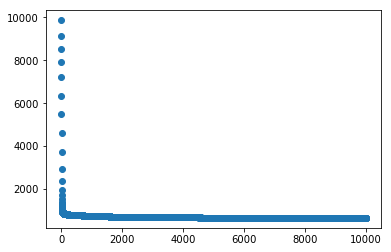

In [65]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [66]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

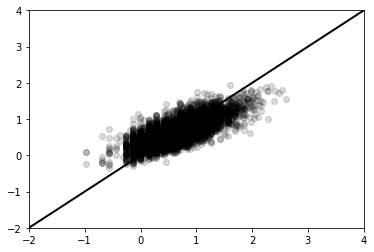

In [67]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 4.1: Validation Set Performance

In [68]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 306.9463
[torch.FloatTensor of size 1]

In [69]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

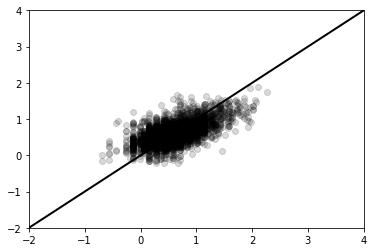

In [70]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 4.2: Test Set Performance

In [71]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 291.6980
[torch.FloatTensor of size 1]

In [72]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.41747 + 7.67485


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

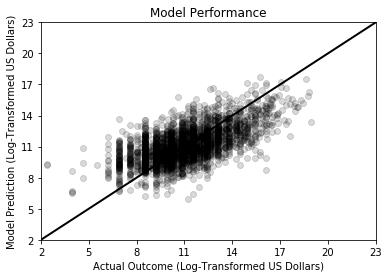

In [73]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [74]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.0035  0.2648 -0.0619  0.1044 -0.1117 -0.0361  0.2032  0.0535 -0.0715  0.1235
 0.1668 -0.1874 -0.1109 -0.0587  0.2228  0.0902  0.0954  0.0726  0.0581  0.0704
 0.2277 -0.3255  0.3784  0.0315  0.1989 -0.0196 -0.0283  0.0183  0.0703 -0.0340
 0.1820  0.4433 -0.2495  0.1878  0.2667  0.1835 -0.4076 -0.1432  0.1519 -0.2813
-0.2894 -0.1308 -0.0013  0.3212  0.1509 -0.2101  0.1402  0.1756 -0.1991  0.1122
 0.0994 -0.4830 -0.0106  0.0315 -0.0117  0.0720 -0.3179 -0.1037  0.2628 -0.1003
 0.1135  0.3148 -0.0470  0.0712  0.3909  0.0376 -0.2000 -0.4439 -0.1794  0.2237
-0.0897  0.2318  0.0517 -0.1367 -0.1162  0.0350  0.0023  0.1598  0.2170  0.0319
-0.0835 -0.5145 -0.1555  0.0950  0.1421  0.1218  0.1238  0.1147  0.1471 -0.1647
 0.3699  0.0524  0.2760 -0.0600  0.2086 -0.0089  0.0064  0.0951  0.1832  0.0139
 0.0808  0.2546 -0.1279  0.0032  0.0617  0.0154 -0.0578  0.3303 -0.0029 -0.1121
-0.0004  0.1014  0.0964  0.0089  0.3012 -0.2886  0.1533  0.0901  0.0661 -0.1304
-

In [75]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.0571  0.0629 -0.1459  0.2901  0.0913 -0.1457 -0.1550  0.1050 -0.0316  0.0660
 0.2021  0.2491  0.2175  0.1049  0.1991  0.1410  0.0599  0.1774  0.3514  0.2900
 0.1178  0.1788  0.0210  0.0727  0.1541  0.3212 -0.0513 -0.1697  0.1158  0.2054
-0.0267 -0.0609 -0.0587  0.0305  0.1884  0.1216  0.1146 -0.0225  0.1895  0.1295
-0.0264  0.1453 -0.2753  0.0759  0.2715  0.0814 -0.2259 -0.0938  0.0411  0.0889
 0.0093  0.1586 -0.1617 -0.2197 -0.0665  0.1135  0.0663  0.2846 -0.1835  0.2157
 0.2185 -0.0266  0.0663 -0.0266  0.3133  0.0993  0.1842  0.1871 -0.0408  0.0865
 0.2429  0.1573 -0.0640  0.3601  0.1400  0.3103 -0.0621  0.2878  0.1320 -0.0562
-0.3233 -0.2733  0.1113  0.1378  0.2826 -0.1737 -0.5086 -0.1231 -0.1558  0.0942
 0.0760 -0.0169  0.3411 -0.0372  0.0490 -0.0461  0.0561  0.2007 -0.0257  0.1763
-0.4332 -0.4107 -0.2087  0.0788  0.2913 -0.1128 -0.8377  0.2929  0.0347 -0.1470
 0.0119 -0.1614  0.1278  0.3450  0.1624  0.1396 -0.0137  0.1084  0.2147 -0.0086
 

In [76]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.2532 -0.2452 -0.2015 -0.0474  0.0975 -0.1957  0.2099 -0.0934  0.1955 -0.2559
 0.5062  0.2295  0.1461  0.1274  0.3401 -0.0731  0.1682  0.1498 -0.6194 -0.1541
 0.1056  0.2827  0.1704 -0.0648 -0.1256 -0.0921  0.0426  0.2369 -0.5636 -0.1724
 0.2506  0.1980  0.0472  0.2191 -0.0052  0.2116  0.3169  0.1990 -0.5982  0.2115
 0.1104 -0.0992  0.1138 -0.1822 -0.2240  0.1321 -0.2565  0.1104  0.1338 -0.0381
-0.1903  0.1035  0.2475  0.1238  0.2570  0.2151  0.1545 -0.0766 -1.0962 -0.0710
 0.2183  0.1637  0.0785 -0.1620  0.1656 -0.1254  0.2254  0.1042  0.0590 -0.0700
 0.4608  0.1577 -0.0061  0.2270  0.6439  0.3656 -0.1171 -0.1886 -1.5137 -0.2717
 0.2531  0.1515  0.1032 -0.0120  0.7238 -0.6949 -0.4774  0.2376  0.4616 -0.1199

Columns 10 to 13 
-0.1626 -0.2332 -0.1690 -0.1658
-0.2798  0.0815  0.4306  0.5693
-0.2667  0.1429  0.0152  0.1481
-0.0105  0.1074  0.0799 -0.1293
-0.2499 -0.0788  0.1491 -0.1813
-0.3761 -0.1595  0.8884  0.6253
-0.1027  0.0387  0.1935 -0.019

In [77]:
model[(6)].weight

Parameter containing:
 0.2775  0.2188  0.0506  0.1481 -0.3050  0.3823  0.3872  1.2156 -1.5377
-0.0050  0.0575  0.1640 -0.2398 -0.2784  0.2641 -0.2554  0.0040 -0.0702
-0.2173 -0.0365  0.2879  0.3509  0.0464  0.2783 -0.1608  1.0843 -1.3763
-0.2593  0.2940 -0.0420 -0.0932 -0.3281 -0.0721 -0.1359  1.0863 -1.4911
 0.0204 -0.1155 -0.1592 -0.1047  0.0320  0.2197  0.1542  0.1371 -0.1030
-0.1150  0.4384  0.3327  0.3547  0.2216 -0.1737 -0.1440  0.7705 -1.2196
[torch.FloatTensor of size 6x9]

In [78]:
model[(8)].weight

Parameter containing:
 0.3651 -0.1210  0.3180  0.4876 -0.2340  0.0761
[torch.FloatTensor of size 1x6]

## Round 5: Five-Hidden-Layer Neural Network

In [79]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [80]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(32, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 14),
                            torch.nn.ReLU(),
                            torch.nn.Linear(14, 9),
                            torch.nn.ReLU(),
                            torch.nn.Linear(9, 6),
                            torch.nn.ReLU(),
                            torch.nn.Linear(6, 4),
                            torch.nn.ReLU(),
                            torch.nn.Linear(4, 1))

In [81]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

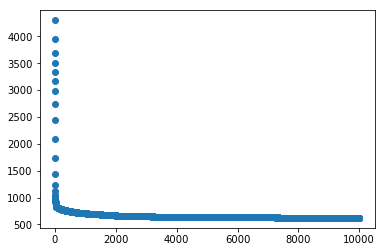

In [82]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [83]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

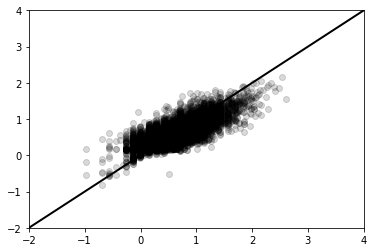

In [84]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 5.1: Validation Set Performance

In [85]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 304.5463
[torch.FloatTensor of size 1]

In [86]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

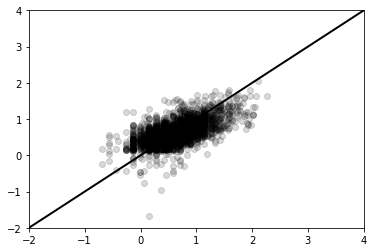

In [87]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 5.2: Test Set Performance

In [88]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 292.6113
[torch.FloatTensor of size 1]

In [89]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.41747 + 7.67485


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

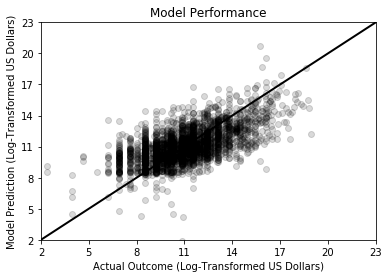

In [90]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [91]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.0514 -0.0887 -0.2621 -0.0506  0.2342  0.1552  0.1456  0.0811 -0.0572  0.1649
-0.3041  0.0121  0.3909  0.0389  0.0541  0.4174 -0.1014 -0.0337 -0.1401  0.0425
 0.0273  0.3115  0.6114  0.1193 -0.0465 -0.0392  0.0432 -0.2317 -0.0191  0.1149
 0.3253 -0.1095  0.0985 -0.1654  0.1971  0.0137  0.0905  0.0002 -0.0287  0.1639
-0.0217 -0.1451 -0.3444  0.1691 -0.0352  0.1331 -0.1385  0.1371  0.1016  0.0370
 0.0336 -0.0973 -0.1293  0.0407  0.2131 -0.1036 -0.0888 -0.0953  0.2980  0.1010
 0.2400  0.3329  0.2890  0.3419  0.2360 -0.4833 -0.1396  0.1391 -0.2207 -0.1886
 0.1898  0.3398  0.0314  0.0093 -0.0270 -0.0888  0.0176 -0.3021  0.0507 -0.0179
 0.0857  0.0383  0.3035  0.1901 -0.0437 -0.4026  0.0579  0.1366 -0.1885 -0.0383
 0.0586 -0.2186 -0.1435 -0.0455 -0.0357 -0.1681  0.0516 -0.0335  0.2425  0.4628
 0.1394  0.1894 -0.2243  0.0509  0.2131  0.3183 -0.1650 -0.0628  0.1687  0.1702
 0.4051  0.0687  0.0841  0.2733  0.1901 -0.3354  0.0263 -0.0944  0.1614  0.2423
 

In [92]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.3386  0.3505 -0.1154  0.1170 -0.6327  0.1551 -0.0374 -0.4544  0.1657  0.2155
-0.0883 -0.0294  0.0924  0.1700 -0.0979  0.0353  0.1815 -0.1930 -0.1691  0.3106
 0.1031  0.1031 -0.3202  0.1248 -0.0697  0.3304  0.3557  0.0490 -0.2923  0.1617
 0.3996 -0.4148  0.4332 -0.4965  0.0741  0.2536 -0.0571 -0.1464  0.1955  0.2262
 0.0867 -0.4264  0.3238  0.1090  0.1059  0.2301  0.0140  0.2695 -0.3135  0.0177
 0.2272 -0.0095  0.0228  0.2585  0.2180  0.1566  0.0079 -0.0880 -0.2290  0.2385
 0.2147  0.2913 -0.1992 -0.0060 -0.0395 -0.3047 -0.1253 -0.3398  0.2318  0.3299
 0.0755  0.3341  0.0613  0.2614 -0.1712  0.1858 -0.1434 -0.0950 -0.1157  0.1145
 0.1273  0.1403  0.2043 -0.1832  0.0862 -0.0963  0.2047 -0.0847 -0.1155  0.2303
-0.6288 -0.2761  0.0542 -0.0680  0.1138  0.2040 -1.0895  0.1545 -0.1073 -0.0168
-0.0586 -0.1822  0.1201  0.1090  0.0827  0.0767 -0.5812  0.0011  0.1739 -0.3111
 0.0497  0.0665 -0.3052  0.3632 -0.0259  0.1887  0.1996 -0.1166 -0.3434  0.2058
 

In [93]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
-0.7550  0.3143 -0.0137  0.9147  0.3350  0.0321 -0.9045  0.0268  0.1197  1.2619
-0.4748  0.3617  0.2137  0.7571  0.0398  0.2854 -0.6449  0.1134  0.2886  0.3072
-0.9416  0.0686  0.1889  0.6581 -0.0976  0.0623 -0.7869  0.0467  0.2702  1.2027
-0.2814  0.3341  0.3617  0.4099  0.2705 -0.0685 -0.4529  0.3269  0.2770  0.1906
 0.4031 -0.0504  0.1075 -0.9394  0.2898 -0.0163  0.1564 -0.2764 -0.0052 -0.0568
-0.1219  0.0982  0.0951  0.4444  0.2221  0.2898 -0.6445  0.2111  0.0443  0.4040
-0.3207 -0.2077  0.0316  0.1999 -0.4093  0.1636  0.3117 -0.2000  0.1888  0.0550
-0.1767  0.3029  0.2713  0.2594 -0.0726  0.1281 -0.6192  0.1736 -0.0384 -0.3141
-0.5173  0.3362  0.0482  0.3923  0.0603  0.1310 -0.1350 -0.1705 -0.0679  0.8414

Columns 10 to 13 
-0.8357  0.0938  0.2458 -0.0268
-0.4808  0.2587 -0.0769  0.3994
-0.4546 -0.3258  0.3306 -0.1085
-0.0312  0.0693  0.4006  0.0404
 0.4318  0.1233  0.2348 -0.2988
-0.0976  0.2495  0.4501  0.0899
 0.5469 -0.1105  0.1486 -0.719

In [94]:
model[(6)].weight

Parameter containing:
 0.5160 -0.0972  0.6358 -0.1162  0.3039 -0.2274  0.2657  0.1899  0.1861
 0.2216 -0.3657  0.0303  0.2273  0.5109 -0.0184 -1.0647  0.0518 -0.2502
-0.2174  0.5654  1.2737 -1.4115  0.4336 -1.3445 -0.0166 -0.7715 -0.0017
 0.4191  0.3405  0.6375  0.4161 -0.1765  0.3719 -0.4629  0.2889  0.4183
 0.2220  0.1683  0.8028  0.3460 -0.4074  0.2266 -0.1467 -0.0493  0.0435
-0.0825 -0.3552 -0.1784  0.6780 -0.0696 -0.3565  0.2257 -0.6251 -0.1917
[torch.FloatTensor of size 6x9]

In [95]:
model[(8)].weight

Parameter containing:
-0.0619  0.6975  2.0447  0.1128  0.1521  2.0564
 0.1285 -1.3031 -2.2757  0.3555  0.5325 -1.5747
-0.3448 -1.5895  2.6139 -0.2688  0.2947  0.1543
 0.0941  1.2389  1.6330 -0.1790 -0.6632  1.4915
[torch.FloatTensor of size 4x6]

In [96]:
model[(10)].weight

Parameter containing:
-0.4077  0.4380 -1.1719 -0.3830
[torch.FloatTensor of size 1x4]

## Round 6: Six-Hidden-Layer Neural Network

In [97]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [98]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(32, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 14),
                            torch.nn.ReLU(),
                            torch.nn.Linear(14, 9),
                            torch.nn.ReLU(),
                            torch.nn.Linear(9, 6),
                            torch.nn.ReLU(),
                            torch.nn.Linear(6, 4),
                            torch.nn.ReLU(),
                            torch.nn.Linear(4, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 1))

In [99]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

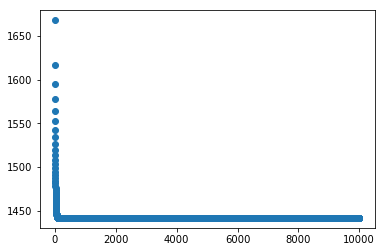

In [100]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [101]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

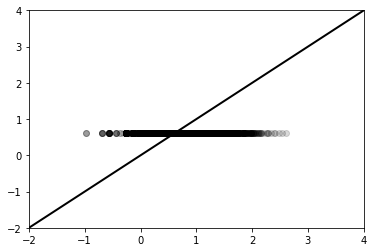

In [102]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 6.1: Validation Set Performance

In [103]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 475.4231
[torch.FloatTensor of size 1]

In [104]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

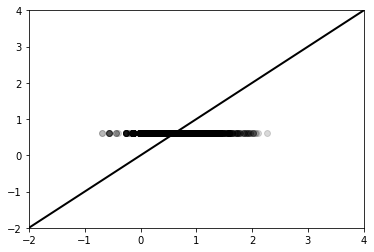

In [105]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 6.2: Test Set Performance

In [106]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 464.4692
[torch.FloatTensor of size 1]

In [107]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.409956 + 7.691221


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

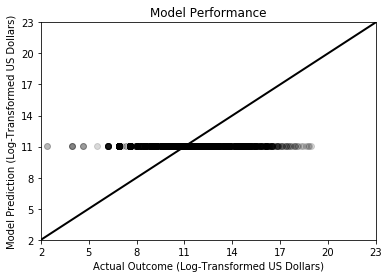

In [108]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [109]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.0125 -0.0850  0.1636 -0.0789  0.1420 -0.0671  0.0890  0.1495 -0.0846 -0.0943
-0.0255 -0.1456 -0.0271 -0.0658  0.1043  0.0464 -0.1683 -0.1587 -0.1161  0.0693
 0.0660  0.1041 -0.0412  0.1260 -0.1643  0.0471  0.1263 -0.1740  0.1248  0.0451
 0.0623  0.1709 -0.0704  0.1190  0.0587 -0.0353 -0.0408  0.1368 -0.1709  0.0403
 0.0518  0.0668 -0.1095 -0.0231 -0.1127  0.0676  0.0392 -0.1048  0.0295  0.1541
-0.1544 -0.0049  0.0968  0.0626 -0.0793  0.0568 -0.0620  0.1722 -0.1430  0.1469
 0.0985  0.0743  0.0634  0.0746 -0.0702  0.1325  0.1544  0.0955 -0.1318  0.0159
-0.0943 -0.1656 -0.0386 -0.1066  0.1125 -0.1142 -0.1753 -0.1183  0.0392  0.0675
 0.1408  0.1136  0.0951 -0.0609  0.1246  0.1048 -0.0282 -0.1616  0.1224 -0.1544
-0.0107  0.0160  0.0949  0.0519 -0.1740  0.0714 -0.1189  0.0366 -0.0721  0.0534
 0.1722 -0.0674 -0.1216 -0.0533  0.1031  0.0536 -0.0060  0.0217  0.1599 -0.0398
-0.0652  0.0901 -0.1519  0.1439 -0.1692 -0.1623 -0.1705  0.1049 -0.0440 -0.1530
 

In [110]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.2177 -0.1825 -0.1517  0.0914  0.0743  0.1706 -0.0684  0.0239  0.1136 -0.1108
 0.1852 -0.1033 -0.0549  0.1249 -0.0361  0.1493  0.0550 -0.1068 -0.1489 -0.0898
 0.2080 -0.1699  0.1579 -0.0633  0.0404 -0.1128 -0.0532 -0.0327 -0.1149  0.1386
-0.1840 -0.2080 -0.0161  0.2078 -0.0030 -0.0029  0.1023 -0.0154  0.1194  0.0039
-0.1198 -0.1076  0.1497 -0.1643 -0.2130 -0.0284  0.1035  0.1225  0.0305  0.0512
-0.1343  0.0510 -0.1942 -0.0737  0.1946 -0.0587  0.0571 -0.1470 -0.0405 -0.0773
 0.2150 -0.1311 -0.0870  0.1375  0.1432 -0.1506 -0.1184  0.0281 -0.1718  0.1321
 0.0036 -0.1865  0.0177  0.1090  0.1478 -0.1649 -0.1085 -0.0921  0.0047 -0.0502
-0.0702 -0.0692 -0.0542  0.0827 -0.2004 -0.1709 -0.0901  0.0498  0.1147 -0.1476
-0.0502 -0.0805 -0.2097  0.0765 -0.0094  0.1631 -0.0621 -0.1312 -0.1656 -0.2146
-0.0479  0.2092 -0.1267 -0.1347  0.1163  0.0351  0.2069  0.0280 -0.0806 -0.1909
 0.0606  0.0529  0.0854 -0.0080  0.1389 -0.1385  0.0779  0.0606  0.1692 -0.0009
 

In [111]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
-0.1138 -0.1595 -0.1388 -0.1299 -0.1550  0.2304 -0.1030 -0.0358 -0.0491  0.0126
-0.2476 -0.2622  0.0264 -0.0387 -0.0841 -0.0621 -0.2113  0.0463 -0.0176 -0.1899
 0.1918  0.1944  0.2043 -0.1125  0.1531 -0.0315  0.1088  0.0855 -0.2128 -0.1422
-0.0782  0.2253  0.2007  0.1949  0.1941  0.0865  0.1787  0.2313 -0.1673 -0.0504
 0.0843  0.1551  0.2062  0.0449  0.0306 -0.0669 -0.1798 -0.0197 -0.1397  0.0041
 0.1242 -0.1656  0.2217  0.2053 -0.1826 -0.2577 -0.0972  0.1710 -0.0172 -0.2084
-0.0529  0.0798 -0.1618  0.0894 -0.2537  0.1561  0.0109  0.0366 -0.1964  0.0492
-0.1244 -0.0070  0.2190  0.1437  0.0004 -0.1060  0.2539 -0.1191 -0.0269  0.2619
 0.1649 -0.0331  0.1965 -0.0855  0.2455 -0.2613 -0.0726  0.0739 -0.1113 -0.2601

Columns 10 to 13 
-0.0093  0.0955  0.0883 -0.1807
-0.0106 -0.0122  0.1629  0.0948
-0.1629 -0.1709 -0.2606 -0.0550
 0.2611 -0.1607 -0.1713 -0.0465
 0.0979  0.0439 -0.1245  0.1061
 0.1781 -0.2547  0.0265  0.1927
 0.2469 -0.1953  0.1238  0.241

In [112]:
model[(6)].weight

Parameter containing:
 0.2931 -0.1933 -0.2666 -0.0392 -0.2162  0.2967  0.0949  0.0696 -0.2570
-0.0894 -0.1109  0.3066  0.2844  0.2775 -0.2498 -0.1542  0.1750 -0.0338
-0.1913 -0.0445 -0.1235 -0.1016 -0.1201  0.0914 -0.1219  0.0534 -0.0547
 0.2564  0.0945  0.3225 -0.1051  0.0530  0.0797 -0.0418  0.0492 -0.3160
-0.2683  0.0348  0.1704 -0.2575 -0.0302 -0.2049  0.2805  0.1248 -0.1422
-0.0183  0.2000 -0.3227 -0.2615  0.1315  0.1621  0.1372 -0.1935  0.1157
[torch.FloatTensor of size 6x9]

In [113]:
model[(8)].weight

Parameter containing:
-0.4060 -0.2951  0.2948  0.1261 -0.2682 -0.2511
 0.1435 -0.3780  0.3493  0.1558  0.1857  0.2275
-0.2808 -0.3369 -0.2858  0.0252 -0.1798 -0.2812
-0.1370  0.3745  0.3580 -0.1269 -0.2068 -0.0157
[torch.FloatTensor of size 4x6]

In [114]:
model[(10)].weight

Parameter containing:
-0.0516 -0.0552  0.1638 -0.2883
-0.2190 -0.0307 -0.0325  0.1310
-0.0331 -0.4704 -0.3062 -0.2649
[torch.FloatTensor of size 3x4]

In [115]:
model[(12)].weight

Parameter containing:
-0.5540  0.3044 -0.1011
[torch.FloatTensor of size 1x3]

## Round 7: Seven-Hidden-Layer Neural Network

In [116]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [117]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(32, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 14),
                            torch.nn.ReLU(),
                            torch.nn.Linear(14, 9),
                            torch.nn.ReLU(),
                            torch.nn.Linear(9, 6),
                            torch.nn.ReLU(),
                            torch.nn.Linear(6, 4),
                            torch.nn.ReLU(),
                            torch.nn.Linear(4, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 2),
                            torch.nn.ReLU(),
                            torch.nn.Linear(2, 1))

In [118]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

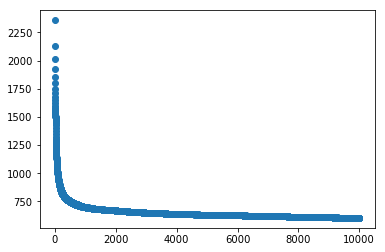

In [119]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [120]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

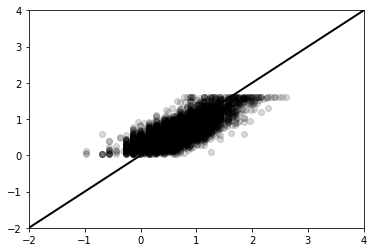

In [121]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 7.1: Validation Set Performance

In [122]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 310.4190
[torch.FloatTensor of size 1]

In [123]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

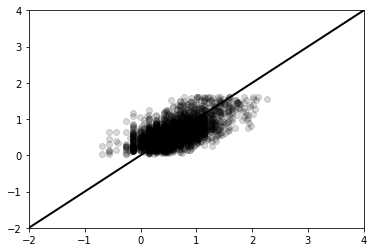

In [124]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 7.2: Test Set Performance

In [125]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 308.3246
[torch.FloatTensor of size 1]

In [126]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.41747 + 7.67485


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

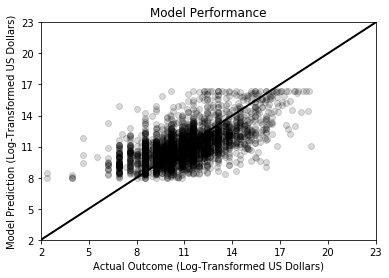

In [127]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [128]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.0259  0.1182 -0.0522  0.1907  0.2484  0.1249 -0.0877 -0.0610  0.3527 -0.1601
 0.1146  0.0074 -0.0814  0.3504  0.0960 -0.4084  0.2047  0.2362 -0.1201 -0.2717
-0.0104  0.1884  0.0145 -0.0433 -0.0320 -0.1366 -0.3211 -0.2851 -0.0342 -0.0720
-0.0682 -0.0831  0.0256 -0.1406 -0.0730  0.0348  0.0048 -0.1938  0.1420  0.0719
-0.2531  0.1609 -0.0015  0.2297 -0.0971  0.0475  0.1594 -0.0114  0.0868 -0.1803
 0.3125 -0.2449 -0.3620 -0.0110  0.1038 -0.2011 -0.0611  0.0542  0.2826  0.2055
 0.1303  0.2055  0.0521  0.1255  0.0671 -0.1234 -0.2486 -0.0367  0.0322  0.3337
-0.2039 -0.0393  0.1111  0.2662 -0.3434  0.1113  0.2749 -0.0583  0.0972 -0.0104
-0.2454 -0.0052  0.1283 -0.3660 -0.1210  0.1961  0.0135  0.0272 -0.2096 -0.0112
-0.0720 -0.0465  0.0794  0.0638  0.1759 -0.0610 -0.0029  0.1874 -0.0522 -0.0581
-0.0818  0.2568  0.0916 -0.1521  0.1326 -0.3096 -0.0231  0.0271 -0.0217  0.3307
-0.0301 -0.3298 -0.1246 -0.0528 -0.0117 -0.0555  0.3139 -0.0446  0.0301  0.0578
 

In [129]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.3399  0.0968  0.1070 -0.0527  0.1154  0.1058  0.0302 -0.0835 -0.2404 -0.0311
-0.2764  0.0783  0.1293  0.2387 -0.0945  0.0958 -0.2020 -0.1982 -0.1202  0.1344
-0.1935 -0.0128 -0.0221 -0.0210  0.1317  0.4001  0.3572 -0.1802 -0.0663  0.0674
 0.2016  0.1703  0.3487  0.2900  0.0532 -0.1948 -0.1500  0.2291  0.0758  0.1925
-0.0050  0.0923  0.0574  0.2867 -0.3342 -0.0639  0.2270 -0.0437 -0.0042 -0.2145
-0.1087 -0.2273 -0.0578  0.1160  0.2245  0.1344 -0.2269 -0.0323 -0.3275 -0.0311
-0.3878  0.2612 -0.0025  0.2847 -0.1513  0.0362 -0.1408 -0.2895  0.0001  0.0393
 0.1689 -0.0241 -0.2408 -0.0489  0.2030  0.2256  0.2008  0.3104  0.0841 -0.0750
 0.3112  0.0588 -0.0488 -0.1034 -0.1902  0.0554  0.0189 -0.4594  0.2090  0.0945
 0.1201  0.3349  0.2002  0.1084 -0.1041 -0.0222 -0.1265  0.1670  0.2885 -0.1846
-0.0203  0.0355  0.0229  0.1475  0.0921 -0.1771  0.2718  0.0734  0.1677 -0.3058
-0.1006  0.2373 -0.0763  0.0744  0.2187  0.2486 -0.0276 -0.0927 -0.2067  0.1827
-

In [130]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.1290  0.0744 -0.1973 -0.0873  0.2638 -0.0644 -0.6035  0.1904  0.0575  0.2075
-0.1223 -0.1065  0.1175  0.3487  0.2955  0.2017 -0.4472 -0.5020 -1.4660 -0.2684
 0.3499 -0.1232  0.3312  0.3707  0.3767  0.0753 -0.3242 -0.1184 -0.3584  0.1890
 0.1400  0.2276 -0.1430  0.1909  0.1899 -0.3863 -0.1395 -0.1800 -0.0524  0.2761
-0.0398 -0.3377  0.3279  0.2041 -0.2029 -0.3084 -0.2242 -0.2131 -0.0123  0.0103
 0.3655  0.1716  0.2876 -0.0228  0.1673 -0.1467 -0.5126 -0.1073 -0.2840  0.1349
 0.0497 -0.2593  0.3627  0.0008 -0.0490  0.0996 -0.0687  0.3267 -0.1436  0.0099
-0.0065  0.0133  0.1402 -0.0111  0.1427 -0.0089 -0.4358 -0.0469 -0.3163  0.1924
 0.2254 -0.4672 -0.0047  0.1515  0.1014 -0.4756  0.0465  0.0459  0.0004 -0.2188

Columns 10 to 13 
-0.0918 -0.2118  0.1564  0.0204
 0.2531  0.1526  0.2944 -0.2431
 0.2090 -0.0880  0.0273  0.2329
 0.3146 -0.1360 -0.3618  0.2333
-0.1966  0.2135  0.0715 -0.1749
-0.1930 -0.0047 -0.3824 -0.0139
-0.1007  0.1838  0.0338 -0.107

In [131]:
model[(6)].weight

Parameter containing:
-0.0138 -1.3894  0.2502  0.2292 -0.1106  0.4399 -0.3943  0.4799 -0.7097
-0.1393  1.2430  0.2188 -0.6232  0.6891  0.0558  0.2286 -0.3918  0.4045
 0.2828 -1.4866  0.0549 -0.0808 -0.6474  0.1608 -0.2482  0.3455 -0.7600
 0.1630 -1.1784  0.1539  0.1009 -0.3668 -0.1167 -0.1197  0.1172  0.0365
 0.2417 -1.3328 -0.0858  0.3214 -0.8388  0.2192  0.1119  0.0834 -0.9390
 0.1863 -1.1944  0.3496 -0.0546 -0.5686  0.1522  0.1446  0.3369 -0.1687
[torch.FloatTensor of size 6x9]

In [132]:
model[(8)].weight

Parameter containing:
 0.3284 -0.7933  0.1701  0.4087  0.0562  0.4467
-0.3708 -0.0703  0.2197 -0.2965 -0.2483  0.2985
 0.4892 -0.4371  0.6515  0.1667  0.5200  0.2223
-0.1044  0.1265 -0.3326 -0.3691 -0.4384  0.4173
[torch.FloatTensor of size 4x6]

In [133]:
model[(10)].weight

Parameter containing:
 0.5289 -0.4015  0.4450  0.2614
-0.0999 -0.0803 -0.0206  0.2110
 0.5440  0.2138  0.5483 -0.2013
[torch.FloatTensor of size 3x4]

In [134]:
model[(12)].weight

Parameter containing:
-0.4877  0.0383 -0.4586
-0.0026 -0.3282 -0.5531
[torch.FloatTensor of size 2x3]

In [135]:
model[(14)].weight

Parameter containing:
 0.9529  1.0130
[torch.FloatTensor of size 1x2]

## Round 8: Linear Regression

In [136]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [137]:
# Make the neural network - really a regression
model = torch.nn.Sequential(torch.nn.Linear(32, 1))

In [138]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 1e-2


# Define the model's optimizer
optimizer = torch.optim.Adagrad(model.parameters(), lr = learning_rate)


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    optimizer.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using Adagrad
    optimizer.step()

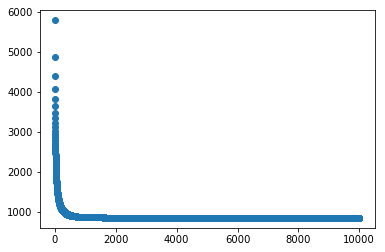

In [139]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [140]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

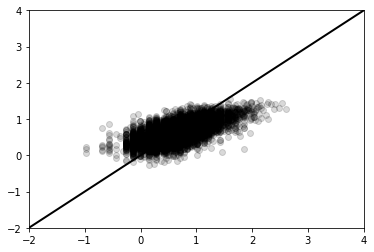

In [141]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 8.1: Validation Set Performance

In [142]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 282.3319
[torch.FloatTensor of size 1]

In [143]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

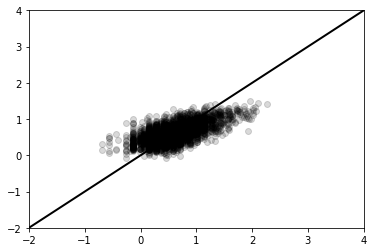

In [144]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 8.2: Test Set Performance

In [145]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 274.8250
[torch.FloatTensor of size 1]

In [146]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.41747 + 7.67485


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

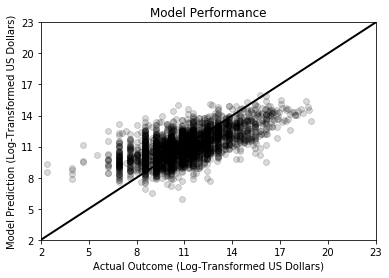

In [147]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [148]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.0037  0.0157  0.0067  0.1504  0.1727 -0.0255 -0.0019 -0.0291  0.0348 -0.0206

Columns 10 to 19 
 0.0280 -0.0223  0.0185 -0.0215 -0.0033  0.0019 -0.0013  0.0164 -0.0054  0.0034

Columns 20 to 29 
 0.0082  0.0119  0.0175  0.0748  0.0141 -0.0026 -0.0326 -0.0076  0.0076  0.0370

Columns 30 to 31 
 0.0130 -0.0028
[torch.FloatTensor of size 1x32]